# Simple example of integrating the hydrogen wavefunction

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

In [2]:
n, l = 10, 5
hydrogen = RydbergState("H", n=n, l=l, j=l + 0.5, steps=10_000, run_backward=True)

In [3]:
hydrogen.integrate()
z_list, x_list = hydrogen.z_list, hydrogen.x_list

In [4]:
from sympy.abc import r as sympy_r
from sympy.physics import hydrogen as sympy_hydrogen
from sympy.utilities.lambdify import lambdify


def calc_R(n: int, l: int, x_list: np.ndarray, Z: int = 1) -> np.ndarray:
    if n <= 30:
        R_nl = lambdify(sympy_r, sympy_hydrogen.R_nl(hydrogen.n, hydrogen.l, sympy_r, Z=1))
        R_list = R_nl(x_list)
    else:
        R_list = np.zeros_like(x_list)
        for i, x in enumerate(x_list):
            R_list[i] = sympy_hydrogen.R_nl(n, l, x, Z)
    return R_list


R_list_symyp = calc_R(hydrogen.n, hydrogen.l, hydrogen.x_list)
u_list_symyp = R_list_symyp * hydrogen.x_list
w_list_symyp = u_list_symyp / np.sqrt(hydrogen.z_list)

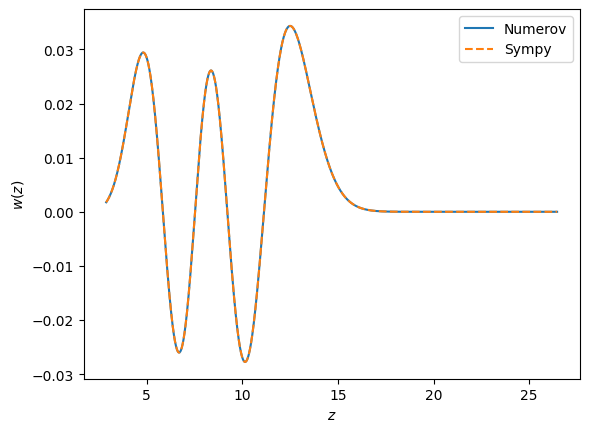

In [5]:
# plt.plot(z_list, np.zeros_like(z_list), c="k", marker=".", ms=1, ls="None", label="steps")
plt.plot(z_list, hydrogen.w_list, "C0-", label="Numerov")
plt.plot(z_list, w_list_symyp, "C1--", label="Sympy")
plt.xlabel(r"$z$")
plt.ylabel(r"$w(z)$")
plt.legend()

plt.show()

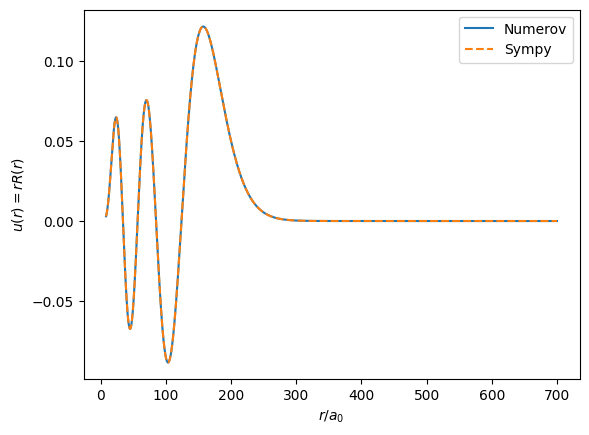

In [6]:
# plt.plot(x_list, np.zeros_like(x_list), c="k", marker=".", ms=1, ls="None", label="steps")
plt.plot(x_list, hydrogen.u_list, "C0-", label="Numerov")
plt.plot(x_list, u_list_symyp, "C1--", label="Sympy")
plt.xlabel(r"$r / a_0$")
plt.ylabel(r"$u(r) = r R(r)$")
plt.legend()

plt.show()

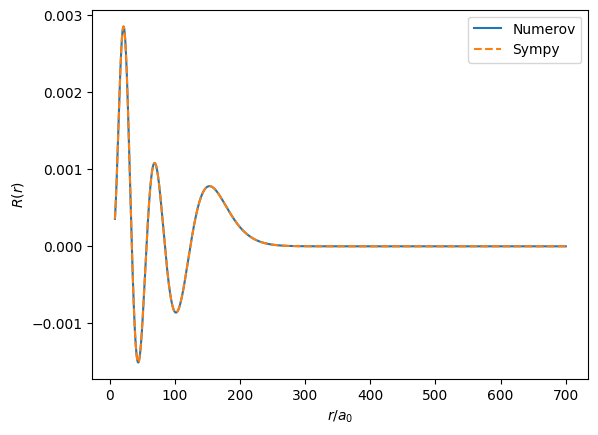

In [7]:
# plt.plot(x_list, np.zeros_like(x_list), c="k", marker=".", ms=1, ls="None", label="steps")
plt.plot(x_list, hydrogen.R_list, "C0-", label="Numerov")
plt.plot(x_list, R_list_symyp, "C1--", label="Sympy")
plt.xlabel(r"$r / a_0$")
plt.ylabel(r"$R(r)$")
plt.legend()

plt.show()